In [1]:
import pandas as pd
import geopandas as gpd
from shapely import Point
from pyproj import Proj, transform
import warnings; warnings.filterwarnings("ignore")

C:\Users\jcge9\AppData\Local\Temp\ipykernel_10964\2301545057.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
datos = pd.read_csv("..\\datos\\coordenadas.csv")
datos.head()

,FileName,GPSDateTime,Latitude,Longitude
0,IMG_20240216_091859,2024:02:16 09:17:30Z,27.940029,-15.521798
1,IMG_20240216_100406,2024:02:16 10:04:02Z,27.875851,-15.425296
2,IMG_20240216_100426,2024:02:16 10:02:57Z,27.929460,-15.509449
3,IMG_20240216_111401,2024:02:16 11:12:29Z,27.928781,-15.483342
4,IMG_20240216_114358,2024:02:16 11:42:29Z,27.930365,-15.480290


## Coordenadas UTM

### Pasar de grados decimales, "**ESPG:4326**" (por defecto en QGIS), al formato de IDECanarias: **ESPG:32628**  

In [3]:
datos = pd.read_csv("..\\datos\\coordenadas.csv")
datos.head()

# Definir la proyección deseada (WGS 1984 / UTM Zone 28N para Canarias)
proyeccion_deseada = Proj(init="epsg:32628")

# Función para transformar las coordenadas de una fila del DataFrame
def transformar_coordenadas(row):
    lat, lon = row["Latitude"], row["Longitude"]
    x, y = transform(Proj(init="epsg:4326"), proyeccion_deseada, lon, lat)
    return round(float(x), 3), round(float(y), 3)

# Aplicar la función a todas las filas del DataFrame
datos[["Latitude", "Longitude"]] = datos.apply(transformar_coordenadas, axis=1, result_type="expand")

# Imprimir el DataFrame resultante
datos

,FileName,GPSDateTime,Latitude,Longitude
0,IMG_20240216_091859,2024:02:16 09:17:30Z,448666.719,3090668.592
1,IMG_20240216_100406,2024:02:16 10:04:02Z,458135.820,3083522.565
2,IMG_20240216_100426,2024:02:16 10:02:57Z,449876.754,3089492.715
3,IMG_20240216_111401,2024:02:16 11:12:29Z,452445.106,3089407.062
4,IMG_20240216_114358,2024:02:16 11:42:29Z,452746.013,3089581.352


## Creamos las capas para QGIS (Archvios Shapefiles: SHP)

In [4]:
geometria_puntos = [Point(xy) for xy in zip(datos["Latitude"], datos["Longitude"])]
gdf_puntos = gpd.GeoDataFrame(datos, geometry=geometria_puntos, crs="epsg:32628")
gdf_puntos.head()

,FileName,GPSDateTime,Latitude,Longitude,geometry
0,IMG_20240216_091859,2024:02:16 09:17:30Z,448666.719,3090668.592,POINT (448666.719 3090668.592)
1,IMG_20240216_100406,2024:02:16 10:04:02Z,458135.820,3083522.565,POINT (458135.820 3083522.565)
2,IMG_20240216_100426,2024:02:16 10:02:57Z,449876.754,3089492.715,POINT (449876.754 3089492.715)
3,IMG_20240216_111401,2024:02:16 11:12:29Z,452445.106,3089407.062,POINT (452445.106 3089407.062)
4,IMG_20240216_114358,2024:02:16 11:42:29Z,452746.013,3089581.352,POINT (452746.013 3089581.352)


<Axes: >

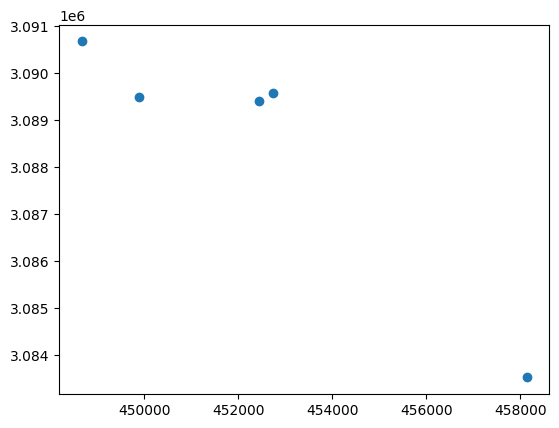

In [5]:
gdf_puntos.plot()

In [6]:
gdf_puntos.to_file("..\\puntos\\capa_puntos.shp")